<a href="https://colab.research.google.com/github/AxelRM2709/Terminal_Economia_2026/blob/main/Clase16_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import datetime as dt
df = pd.read_csv("/content/Google-Playstore.csv")
#df.head() # imprimir los primeros 5
# df.columns = ['Col 1', 'Col2'] seleccionar columnas, también se puede df.Col1
#df.iloc[2:,:] # Seleccionar filas y columnas, de esta manera se eliminan las primeras dos filas
#df = df.iloc[2:,:].reset_index(drop = True) # Para que empiece desde 0 en el nuevo dataframe
#df.tail() # Ver las últimas 5 filas
'''
df.info() # Tipos de variables, no nulos, columnas, etc

# Ejemplo: Una fecha aparece como objeto
df['Date'] = pd.to_datetime(df['Date'])
df['Close'] = df.Close.astype('float')
df['High'] = df.High.astype('float') # Se evita poner max para poder llamar a la función max sin problemas
df['Low'] = df.Low.astype('float')
df['Open'] = df.Open.astype('float')
df['Volume'] = df.Volume.astype('int')

df.describe() # Datos básicos de estadistica de las columnas
df.dtypes() # Tabla de tipos de las columnas
# Filtrar:
df[df.Open > 250]
df[(df.Open < 250) & (df.Open > 100)]
df.loc[df.Open < 200] # Con loc puedes crear columnas
df.loc[df.Open > 250, 'Status'] = 'Atipico' # Crear columna, los que cumplan la condición tienen el valor de atipico
df['Tendencia'] = 'Estable' # Crear columna con todos de valor 'Estable', actuará como valor base
df.loc[df.Close > df.Close.shift(1), 'Tendencia'] = 'Sube' # Shift compara con el de la fila anterior
df = df.sort_values(by = 'Date') # Ordenar por fecha
df= df.sort_values(by = 'High', ascending = False) # De mayor a menor
df.sort_values( by = ['Tendencia', 'High'], ascending = [True, False]) # Ordenar con varias columnas
df['Rango'] = df['High'] - df['Low'] # Crear columna con una resta de otras
df.Tendencia.unique() # Lista con los valores únicos
df.Tendencia.nunique() # Cuántas etiquetas son únicas (por ejemplo, 3)
df['Year'] = df.Date.dt.year # Calcular el año, es necesario que Date sea del valor adecuado
df['Month'] = df.Date.dt.month
df['Day'] = df.Date.dt.day
df['Week day'] = df.Date.dt.weakday # Día de la semana, 0 es lunes
df = df.drop(columns = ['Status', 'Tendencia']) # Eliminar columnas
col = ['Date', 'Year', 'Month', 'Day', 'Week day']
df[col] # Crear un dataframe con las columnas deseadas y con ese orden
'''

In [ ]:
import pandas as pd
import yfinance as yf
import datetime as dt
df_spax = yf.download('SPAX', start = '2024-01-01', end = '2026-01-01')
df_spax = df_spax.reset_index()
df_spax['Date'] = pd.to_datetime(df_spax['Date'])
df_spax['Close'] = df_spax.Close.astype('float')
df_spax['High'] = df_spax.High.astype('float')
df_spax['Low'] = df_spax.Low.astype('float')
df_spax['Open'] = df_spax.Open.astype('float')
df_spax['Volume'] = df_spax.Volume.astype('int')
df_spax.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df_spax = df_spax.sort_values(by = 'Date')

df_aapl = yf.download('AAPL', start = '2024-01-01', end = '2026-01-01')
df_aapl = df_aapl.reset_index()
df_aapl['Date'] = pd.to_datetime(df_aapl['Date'])
df_aapl['Close'] = df_aapl.Close.astype('float')
df_aapl['High'] = df_aapl.High.astype('float')
df_aapl['Low'] = df_aapl.Low.astype('float')
df_aapl['Open'] = df_aapl.Open.astype('float')
df_aapl['Volume'] = df_aapl.Volume.astype('int')
df_aapl.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df_aapl = df_aapl.sort_values(by = 'Date')

pd.concat([df_aapl, df_spax], ignore_index = True) # Juntar dataframes, ignore es para que empiece desde 0 y no se reinicie
#df_aapl.merge(df_spax, how = 'inner', on = ['Date'] ) # Importante el orden, es como join de sql, how = left, right, outer, inner (default), left_outer, right_outer
df_merge = df_aapl.merge(df_spax, how = 'inner', left_on = ['Date'], right_on = ['Date'], suffixes = ('_aapl', '_spax') ) # Ponerle nombres a las columnas
ruta = "/content/JuntarDF.csv"
df_merge.to_csv(ruta)

df_merge.describe() # Datos estadisticos
print(f"{df_merge['Close_aapl'].mean():.2f}") # Promedio de la columna
df_merge['Close_aapl'].median()
df_merge['Close_aapl'].std()
df_merge['Close_aapl'].min()
df_merge['Close_aapl'].max()
df_merge['Close_aapl'].var()


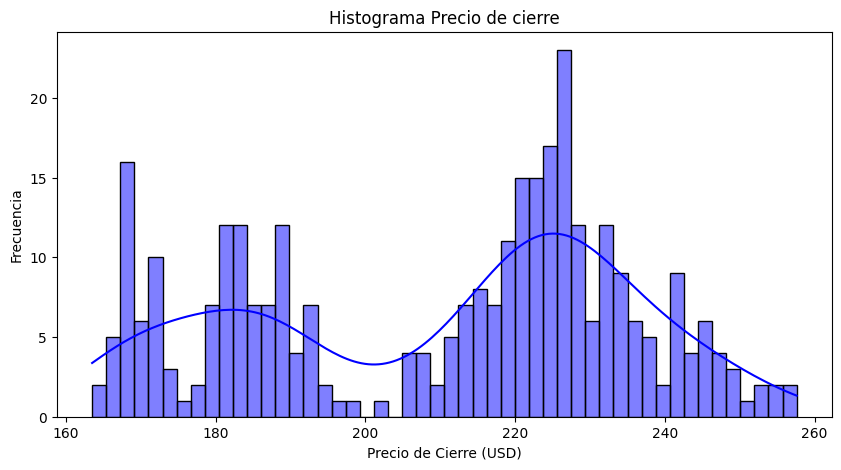

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns # Gráficos estadísticos
plt.figure(figsize = (10,5))
sns.histplot(df_merge['Close_aapl'], bins = 50, kde = True, color = 'blue')
plt.title('Histograma Precio de cierre')
plt.xlabel('Precio de Cierre (USD)')
plt.ylabel('Frecuencia')
plt.show()

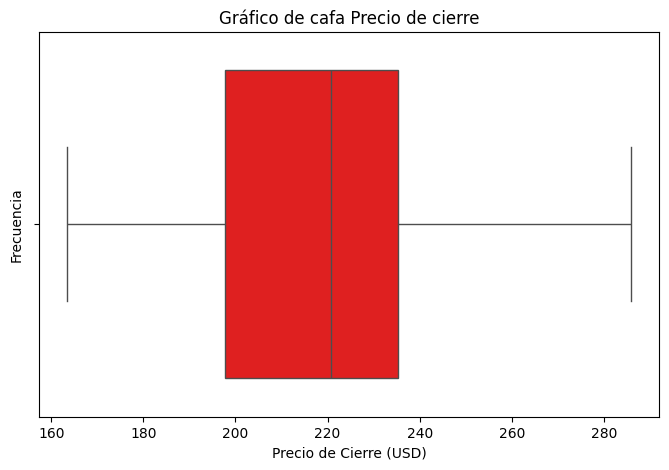

In [18]:
plt.figure(figsize = (8,5))
sns.boxplot(x = df_aapl['Close'], color = 'red')
plt.title('Gráfico de cafa Precio de cierre')
plt.xlabel('Precio de Cierre (USD)')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
df_aapl.isnull().sum #cuántos datos son nulos por columna
df_aapl.dropna() # Eliminar datos nulos
df_aapl['Close'].fillna(df_aapl.Close.mean) # Llenar valores nulos con un valor

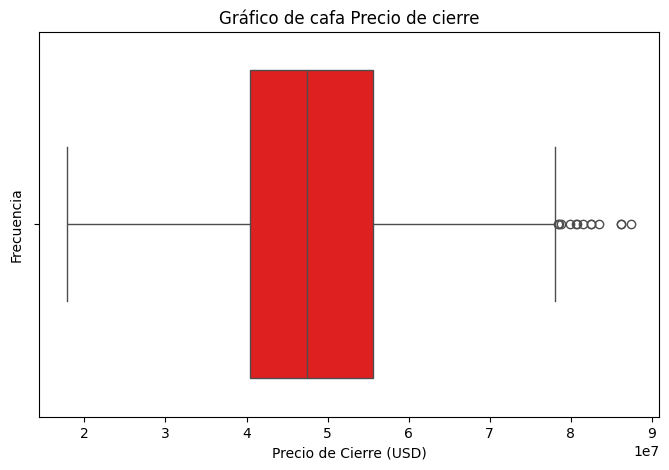

In [27]:
import numpy as np
Q1 = df_aapl['Volume'].quantile(0.25) # 1er cuartil
Q3 = df_aapl['Volume'].quantile(0.75) # 3er cuartil
IQR = Q3 - Q1 # Distancia entre cuartiles
proporcion = 1.5
li = Q1 - proporcion*IQR # Límite inferior
ls = Q3 + proporcion*IQR # Límite superior
df_outlier = df_aapl[(df_aapl.Volume < li) | (df_aapl.Volume > ls)]
df_outlier.shape
df_clean = df_aapl[(df_aapl.Volume >= li) & (df_aapl.Volume <= ls)]
plt.figure(figsize = (8,5))
sns.boxplot(x = df_clean['Volume'], color = 'red')
plt.title('Gráfico de cafa Precio de cierre')
plt.xlabel('Precio de Cierre (USD)')
plt.ylabel('Frecuencia')
plt.show()

In [29]:
df_aapl.Volume.mean()

np.float64(55647117.729083665)

In [30]:
df_clean.Volume.mean()

np.float64(49396956.95652174)

In [32]:
corr_matrix = df_aapl[['Open', 'High', 'Low', 'Close', 'Volume']].corr() # Variables numericas y no nulas
corr_matrix # Matriz de correlaciones, 1 y si están correlacionadas proporcionalmente y -1 si están correlacionadas inversamente

,Open,High,Low,Close,Volume
Open,1.000000,0.996567,0.997521,0.994392,-0.244714
High,0.996567,1.000000,0.995947,0.997606,-0.209533
Low,0.997521,0.995947,1.000000,0.997318,-0.259739
Close,0.994392,0.997606,0.997318,1.000000,-0.232956
Volume,-0.244714,-0.209533,-0.259739,-0.232956,1.000000


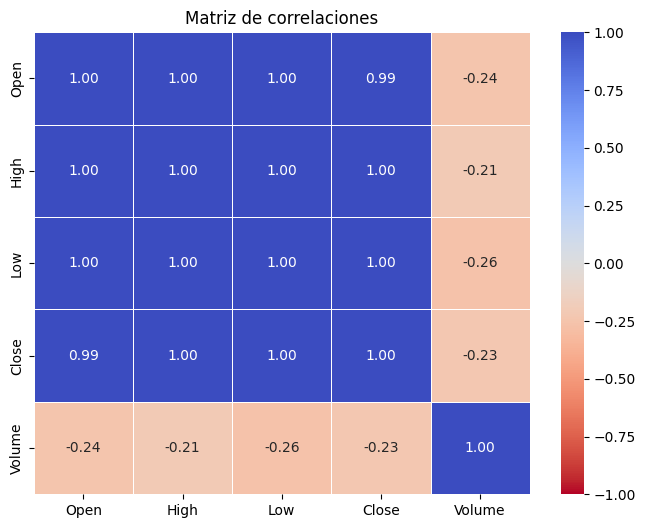

In [33]:
plt.figure(figsize = (8,6))
sns.heatmap(corr_matrix, annot = True, vmin = -1, vmax = 1, cmap = 'coolwarm_r',# Color rojo a azul
            linewidths = 0.5, fmt = ".2f")
plt.title("Matriz de correlaciones")
plt.show()

In [35]:
import plotly.express as px # Gráficas interactivas
fig = px.scatter_matrix(df_aapl, dimensions =['Open', 'Close', 'High', 'Low', 'Volume'],
                        title = 'Correlacion de Variables') # Pendiente, color = 'Tendencia'
fig.show()